In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [ ]:
# Import data

# Option 1: Mounting Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Load from saved location
#import pandas as pd
#X_train = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_train.xlsx')
#X_test = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_test.xlsx')
#y_train = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_train.xlsx')
#y_test = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_test.xlsx')

# Option 2: Downloaded Files
X_train = pd.read_excel('X_train.xlsx')
X_test = pd.read_excel('X_test.xlsx')
y_train = pd.read_excel('y_train.xlsx')
y_test = pd.read_excel('y_test.xlsx')

In [ ]:
# Shape
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (21024, 5)
X_test Shape: (5256, 5)
y_train Shape: (21024, 1)
y_test Shape: (5256, 1)


# Create and Test Model

In [ ]:
# Create and train RF model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initiate model
model = RandomForestRegressor(n_estimators=300, random_state=42)
# Train model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=300, random_state=42)

In [ ]:
# Predict with model
y_pred = model.predict(X_test)

# Test accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2:', r2)

# Tuning hyperparameters
# For n_estimators = 200
# MSE: 0.08897130987645806, R2: 0.9999440583053585
# For n_estimators = 100
# MSE: 0.0909585088026183, R2: 0.9999428088320655
# For n_estimators = 300
# MSE: 0.08863137731099531, R2: 0.9999442720417169

MSE: 0.08863137731099531
R2: 0.9999442720417169


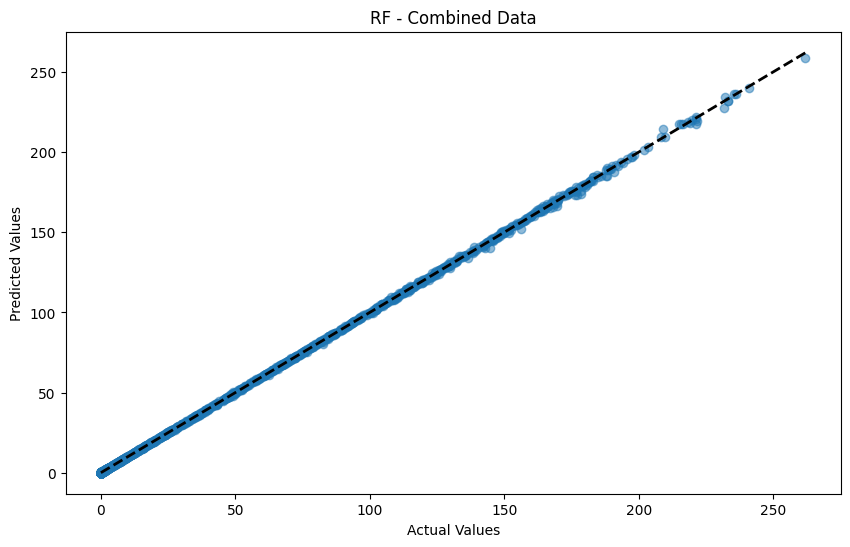

In [ ]:
# Visualize random forest model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # min and max for diagonal line
plt.title('RF - Combined Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Predict with 2023 Data

In [ ]:
# Import 2023 data

# Option 1: Mounting Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Load from saved location
# South
#import pandas as pd
#X_train_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_train_23.xlsx')
#X_test_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_test_23.xlsx')
#y_train_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_train_23.xlsx')
#y_test_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_test_23.xlsx')

# Extract target variable as 1D arrays
#y_train_23 = y_train_23['Energy'].values  # fixing added column issue
#y_test_23 = y_test_23['Energy'].values

# Option 2: Downloaded Files
X_train_23 = pd.read_excel('X_train_23.xlsx')
X_test_23 = pd.read_excel('X_test_23.xlsx')
y_train_23 = pd.read_excel('y_train_23.xlsx')['Energy']
y_test_23 = pd.read_excel('y_test_23.xlsx')['Energy']

In [ ]:
# Shape
print('X_train_23 Shape:', X_train_23.shape)
print('X_test_23 Shape:', X_test_23.shape)
print('y_train_23 Shape:', y_train_23.shape)
print('y_test_23 Shape:', y_test_23.shape)

X_train_23 Shape: (21024, 5)
X_test_23 Shape: (5256, 5)
y_train_23 Shape: (21024,)
y_test_23 Shape: (5256,)


In [ ]:
# Reshape data
X_test_23_reshape = X_test_23.values

In [ ]:
# Predict data
y_pred_23 = model.predict(X_test_23_reshape)  # Use X_test_23 for prediction

# Check accuracy
mse_test_23 = mean_squared_error(y_test_23, y_pred_23)  # Use y_test_23 for evaluation
r2_test_23 = r2_score(y_test_23, y_pred_23)
print('Test MSE South 2023:', mse_test_23)
print('Test R^2 South 2023:', r2_test_23)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Test MSE South 2023: 11.87935152576199
Test R^2 South 2023: 0.9924314184240406


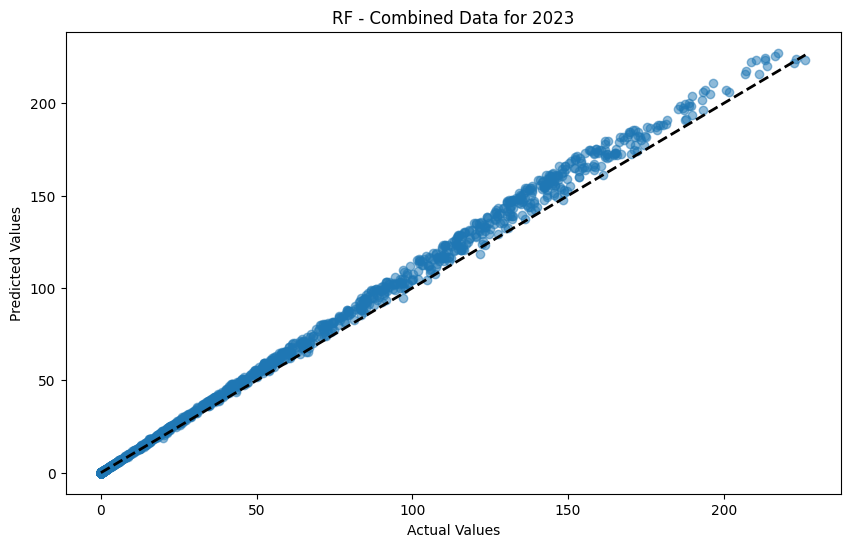

In [ ]:
# Visualize model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_23, y_pred_23, alpha=0.5)
plt.plot([y_test_23.min(), y_test_23.max()], [y_test_23.min(), y_test_23.max()], 'k--', lw=2)  # Diagonal line
plt.title('RF - Combined Data for 2023')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

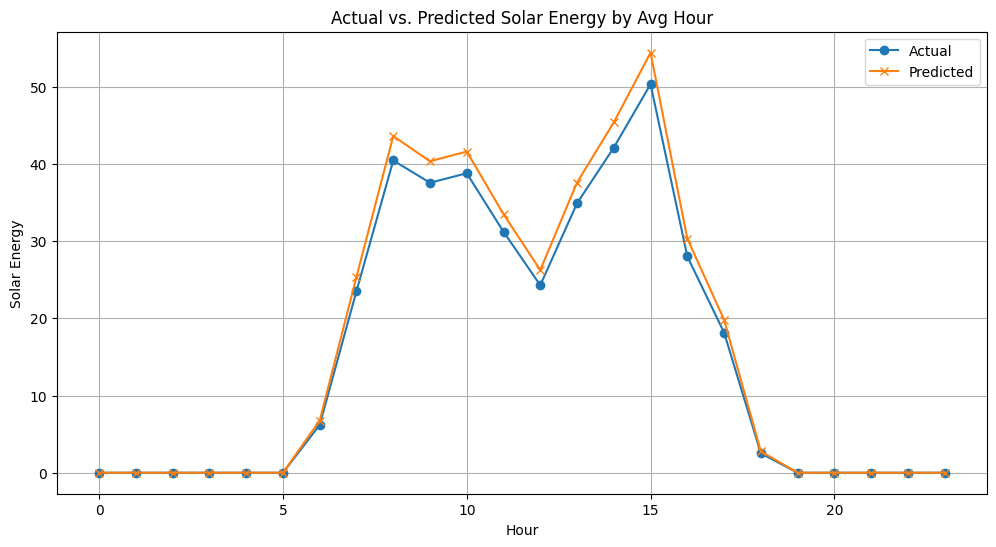

In [ ]:
# Energy vs Hour Plot
# Dataframe to hold the data
results_df = pd.DataFrame({'Hour': X_test_23['Hour'], 'Actual': y_test_23, 'Predicted': y_pred_23})
#results_df = pd.DataFrame({'Date': X_test_23['Date'], 'Actual': y_test_23, 'Predicted': y_pred_23})

# Group by hour and calculate the average energy for each hour
hourly_avg = results_df.groupby('Hour').mean()
#daily_avg = results_df.groupby('Date').mean()

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg['Actual'], label='Actual', marker='o')
plt.plot(hourly_avg.index, hourly_avg['Predicted'], label='Predicted', marker='x')
plt.xlabel('Hour')
plt.ylabel('Solar Energy')
plt.title('Actual vs. Predicted Solar Energy by Avg Hour')
plt.legend()
plt.grid(True)
plt.show()

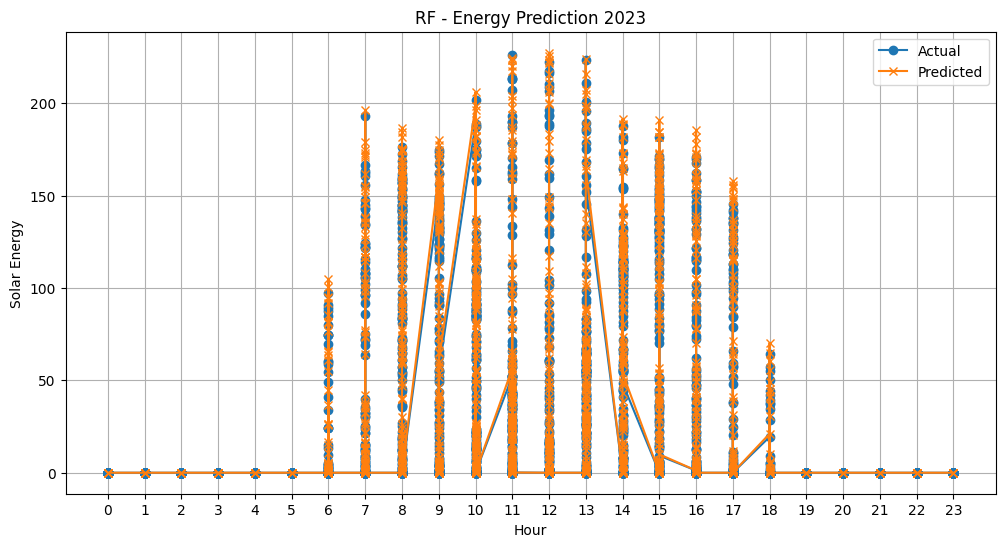

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Flatten y_pred
y_pred_23 = y_pred_23.flatten()

# Create a DataFrame to hold the data
results_df = pd.DataFrame({'Hour': X_test_23['Hour'], 'Actual': y_test_23, 'Predicted': y_pred_23})

# Sort by hour
results_df = results_df.sort_values(by=['Hour']) # This will sort the dataframe based on hour which will help in plotting

# Plot the actual and predicted values wrt hour
plt.figure(figsize=(12, 6))
plt.plot(results_df['Hour'], results_df['Actual'], label='Actual', marker='o')
plt.plot(results_df['Hour'], results_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Hour')
plt.ylabel('Solar Energy')
plt.title('RF - Energy Prediction 2023')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Set x-axis ticks to represent hours 0-23
plt.show()